# งานเพื่อวัดผลการเรียนรู้ของผู้เข้าอบรม (60 คะแนน)
Cat and Dog

เพื่อให้เกิดความง่ายในการทำความเข้าใจ **ผมจะขอเรียก DataFrame ว่าตาราง (Table)**

In [1]:
import pandas as pd

# สร้างตารางที่จัดเก็บข้อมูลของสุนัข และแมวตามคุณลักษณะ (Features) ประกอบด้วย
# หน้ากลม (face), หูตั้ง (ear), สีน้ำตาล (brown), แลบลิ้น (tongue), หนวดยาว (whisker)
data = pd.DataFrame({
    'face':[0, 0, 0, 1, 1, 0],                # หน้ากลม
    'ear':[1, 0, 0, 1, 1, 1],                 # หูตั้ง
    'brown':[1, 1, 1, 0, 1, 0],               # สีน้ำตาล
    'tongue':[1, 1, 0, 0, 0, 0],              # แลบลิ้น
    'whisker':[1, 0, 0, 1, 1, 1],             # หนวดยาว
    'target':['dog', 'dog', 'dog', 'cat', 'cat', 'cat'] # ค่าเป้าหมาย (target) หรือ คลาส (class) หรือ ฉลาก (label)
})

data

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,dog
1,0,0,1,1,0,dog
2,0,0,1,0,0,dog
3,1,1,0,0,1,cat
4,1,1,1,0,1,cat
5,0,1,0,0,1,cat


## แปลงรหัส (Encoding) ค่าเป้าหมาย (target) จากตัวอักษร 'cat' และ 'dog' ให้กลายเป็นตัวเลขแบบ Label (5 คะแนน)

In [5]:
# Label Encoding ค่าเป้าหมาย (target) แล้วเก็บไว้ใน คอลัมน์ data['target']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])
print(data)

   face  ear  brown  tongue  whisker  target
0     0    1      1       1        1       1
1     0    0      1       1        0       1
2     0    0      1       0        0       1
3     1    1      0       0        1       0
4     1    1      1       0        1       0
5     0    1      0       0        1       0


## แปลงข้อมูลคุณลักษณะ (Features) ที่จัดเก็บใน DataFrame ให้อยู่ในรูป numpy.array 2 มิติ / และ numpy.array ของค่าเป้าหมาย ('target') (25 คะแนน)

In [6]:
# จัดทำ numpy.array สำหรับจัดเก็บคุณลักษณะ (Features) ที่เราจะใช้ในการตัดสินใจ และ ค่าเป้าหมาย (target) (25 คะแนน)
X = data.drop('target', axis=1).values # Features
y = data['target'].values           # Target
print("Features (X) as numpy array:\n", X)
print("\nTarget (y) as numpy array:\n", y)

Features (X) as numpy array:
 [[0 1 1 1 1]
 [0 0 1 1 0]
 [0 0 1 0 0]
 [1 1 0 0 1]
 [1 1 1 0 1]
 [0 1 0 0 1]]

Target (y) as numpy array:
 [1 1 1 0 0 0]


## สร้าง Decision Tree Classifier เพื่อสร้างแบบจำลองต้นไม้สำหรับการจำแนก แมว กับสุนัข (20 คะแนน)

In [7]:
# นำเข้า Library ของต้นไม้ที่ใช้ในการตัดสินใจ
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# สร้างแบบจำลองของต้นไม้ที่ใช้ในการตัดสินใจ (5 คะแนน)
model = DecisionTreeClassifier()

# ส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไป Train (10 คะแนน)
model.fit(X, y)

# ทดสอบความถูกต้องของแบบจำลอง โดยส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไปทดสอบ (5 คะแนน)
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

print(f"แบบจำลองได้รับการฝึกฝนเรียบร้อยแล้ว")
print(f"ความถูกต้องของแบบจำลอง (Accuracy): {accuracy:.2f}")

แบบจำลองได้รับการฝึกฝนเรียบร้อยแล้ว
ความถูกต้องของแบบจำลอง (Accuracy): 1.00


### แสดงต้นไม้ตัดสินใจ (Decision Tree) (10 คะแนน)

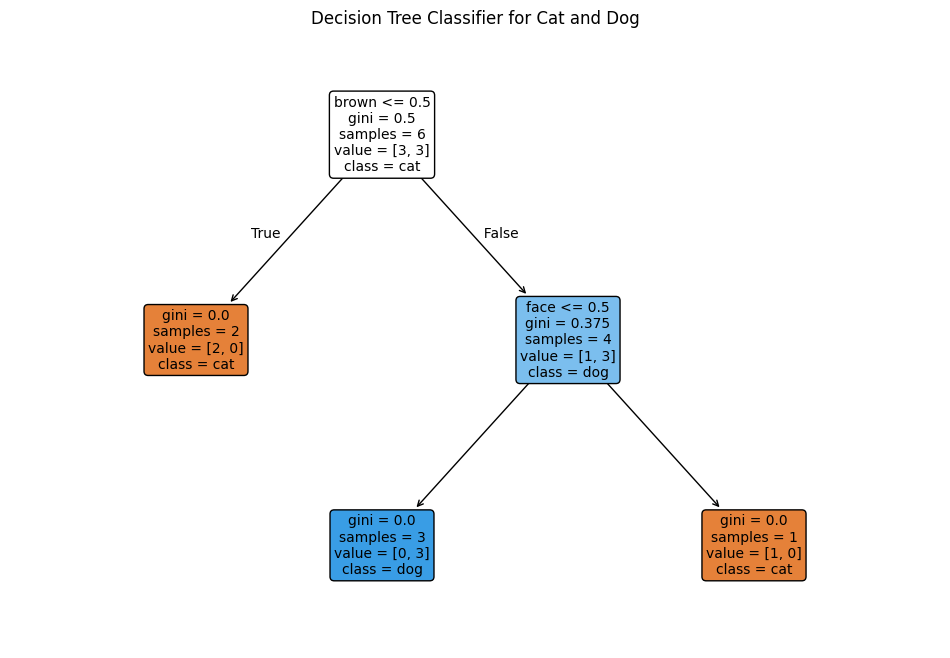

In [17]:
# นำเข้า Library สำหรับวาดต้นไม้
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# เตรียมชื่อคุณลักษณะและชื่อคลาสสำหรับแสดงผล
feature_names = data.drop('target', axis=1).columns.tolist()
# แก้ไข: กำหนด class_names เป็นสตริงโดยตรงเพื่อให้ plot_tree ทำงานได้ถูกต้อง
# 'cat' ถูกเข้ารหัสเป็น 0, 'dog' ถูกเข้ารหัสเป็น 1
class_names = ['cat', 'dog']
#ส่วนของโค้ดที่เคยใช้ plot_tree ถูกลบออกไปแล้วตามคำขอครับ
#หากต้องการแสดงผลเป็นภาพอีกครั้ง สามารถเพิ่มโค้ดด้านล่างนี้กลับเข้าไปได้:
plt.figure(figsize=(12, 8))
plot_tree(model,
           feature_names=feature_names,
           class_names=class_names,
           filled=True,
           rounded=True,
           fontsize=10)
plt.title("Decision Tree Classifier for Cat and Dog");
plt.show()

In [11]:
# วาดต้นไม้ในลักษณะที่แสดงเป็นข้อความ (export_text) ที่คนทั่วไปสามารถเข้าใจได้ (5 คะแนน)
from sklearn.tree import export_text
# สร้าง Decision Tree ในรูปแบบข้อความ
tree_rules = export_text(model, feature_names=feature_names, class_names=class_names)
print(tree_rules)

|--- brown <= 0.50
|   |--- class: cat
|--- brown >  0.50
|   |--- face <= 0.50
|   |   |--- class: dog
|   |--- face >  0.50
|   |   |--- class: cat

